In [19]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words= 10000)

In [20]:
word_index = imdb.get_word_index() #word index는 단어와 정수 인덱스 매핑 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #items()는 튜플 쌍이 들어간 리스트로.
decoded_review = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]] #get()은 해당 키의 값을 반환
)

In [21]:
import numpy as np

def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))  #zero() 인자로 튜플 받는다!!!! [[0. 0. 0. 0.][0. 0. 0. 0.]]이런 모양이심
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [22]:
y_train = np.asarray(train_labels).astype('float32') #asarray는 배열로 변환하는 것, astype는 dtype 바꾸기
y_test = np.asarray(test_labels).astype('float32')

# 모델 정의하기

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델 컴파일

In [24]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# 훈련 검증

In [25]:
x_val= x_train[:10000]
part_x_train = x_train[10000:]
y_val = y_train[:10000]
part_y_train = y_train[10000:]

# 모델 훈련하기

In [27]:
model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history = model.fit(part_x_train, part_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
#fit()는 history(훈련 정보의) 객체 반환. 딕셔너리!!!인 history 속성!!!

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5384 - accuracy: 0.7771 - val_loss: 0.4118 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3350 - accuracy: 0.8931 - val_loss: 0.3174 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2487 - accuracy: 0.9159 - val_loss: 0.2924 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2002 - accuracy: 0.9332 - val_loss: 0.2757 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1674 - accuracy: 0.9442 - val_loss: 0.2754 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1395 - accuracy: 0.9549 - val_loss: 0.2994 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1207 - accuracy: 0.9613 - val_loss: 0.3009 - val_accuracy: 0.8861
Epoch 8/20
30

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 훈련과 검증 손실 그리기

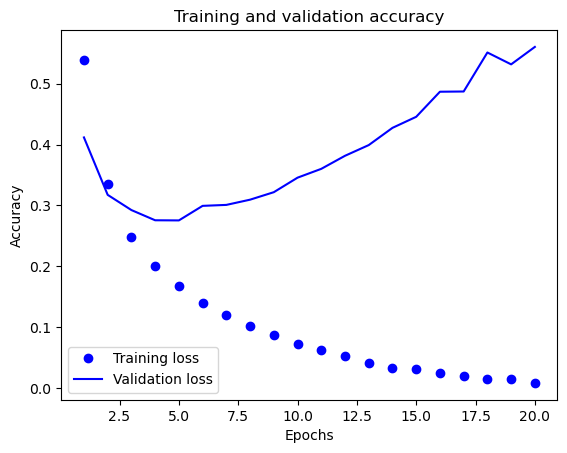

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

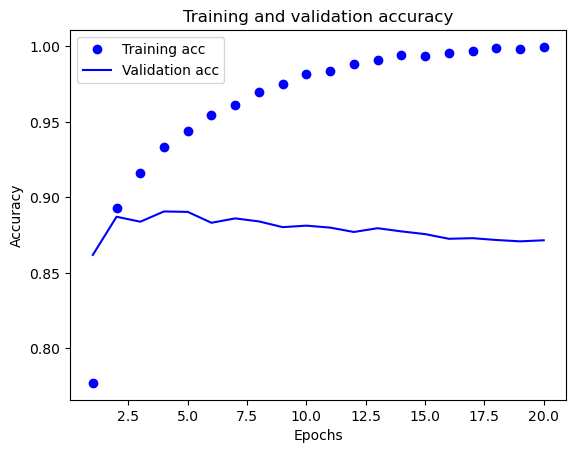

In [38]:
acc= history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, batch_size= 512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 2s 17ms/step - loss: 0.1923 - accuracy: 0.7762
Epoch 2/10
49/49 [==============================] - 1s 30ms/step - loss: 0.1026 - accuracy: 0.8875
Epoch 3/10
49/49 [==============================] - 1s 20ms/step - loss: 0.0732 - accuracy: 0.9114
Epoch 4/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0610 - accuracy: 0.9251
Epoch 5/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0522 - accuracy: 0.9381
Epoch 6/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0463 - accuracy: 0.9443
Epoch 7/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0422 - accuracy: 0.9510
Epoch 8/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0378 - accuracy: 0.9564
Epoch 9/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0344 - accuracy: 0.9618
Epoch 10/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0951 - accuracy: 0.8756


In [52]:
results

[0.09513623267412186, 0.8755999803543091]

In [50]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.23186995],
       [0.9873791 ],
       [0.84749526],
       ...,
       [0.16924761],
       [0.11629201],
       [0.5223204 ]], dtype=float32)